In [ ]:
from pathlib import Path
import os

with open('/home/peacelovephysics/alan_watts_bot/data/output.txt', 'r') as f:
    data = f.read().splitlines()

with open('/home/peacelovephysics/alan_watts_bot/data/mp3_file_list.txt', 'r') as f:
    mp3_list = f.read().splitlines()

In [7]:
empty_line_count = 0
file_index = -1
for linenum, line in enumerate(data):
    if linenum == 0:
        continue
    if line == '':
        empty_line_count += 1
        if empty_line_count == 2:
            file_index += 1
            empty_line_count = 0
            # if file_index == 2:
            #     break
            
            filename = f"./data/output/{'/'.join(mp3_list[file_index].split('/')[2:])}.txt"
            filepath = Path(filename)
            if not filepath.parent.exists():
                filepath.parent.mkdir(parents=True)
            if os.path.exists(filename):
                os.remove(filename)
    else:
        with open(filename, 'a') as f:
            f.write(line + '\n')
        

print(f"Total {file_index + 1} files created")


# for i, block in enumerate(data):
#     if block.strip() != '':
#         filename = mp3_list[i] + '.txt'
#         with open(filename, 'w') as f:
#             f.write(block)

Total 395 files created


In [5]:
print(file_index)

394


In [152]:
with open('data/output.txt', 'r') as f:
    data = f.read().splitlines()

for linenum, line in enumerate(data):
    if linenum > 55000 and 'watts' in line.lower():
        print(f"{linenum + 1}) {line}")
    if linenum > 60000:
        break

In [173]:
# Read the contents of output.txt
with open("data/output.txt", "r") as f:
    output_contents = f.read()

# Read the filenames from mp3_file_list.txt
with open("data/mp3_file_list.txt", "r") as f:
    filenames = f.readlines()

# Create a new file file_starts.txt
with open("data/file_starts.txt", "w") as f:
    newline_count = 0
    file_count = 0
    for linenum, line in enumerate(output_contents.split('\n')):
        if linenum == 0:
            continue
        if line == '':
            newline_count += 1
            if newline_count == 2:
                # if file_count == 0:
                if file_count == len(filenames):
                    print(f"File count: {file_count}")
                    print(f"Line number: {linenum}")
                    break
                f.write(f"{file_count + 1}) {linenum + 2} - {filenames[file_count]}")
                # else:
                #     f.write(f"{file_count + 1}) {linenum - 10} - {filenames[file_count]}")
                file_count += 1
                newline_count = 0

In [158]:
import re

def parse_line(line):
    # Extract the second number using regex
    match = re.search(r'\)\s+(\d+)\s+-', line)
    if match:
        return int(match.group(1))
    return None

def find_small_differences(lines):
    # Initialize a list to hold results
    results = []
    
    # Iterate through the lines, comparing consecutive lines
    for i in range(len(lines) - 1):
        num1 = parse_line(lines[i])
        num2 = parse_line(lines[i + 1])
        
        if num1 is not None and num2 is not None:
            difference = num2 - num1
            if difference < 10:
                results.append((i + 1, lines[i], lines[i + 1], difference))
    
    return results

# Sample data (you can replace this with reading from a file)
with open("data/file_starts.txt", "r") as f:
    lines = f.readlines()

# Find the lines with small differences
results = find_small_differences(lines)

# Print the results
for index, line1, line2, difference in results:
    print(f"Line {index}: Difference of {difference} between:")
    print(f"  {line1}")
    print(f"  {line2}")


Line 21: Difference of 8 between:
  21) 1803 - ./data/Alan Watts HUGE Collection/Alan Watts - Meditation/11 alan watts meditation.mp3

  22) 1811 - ./data/Alan Watts HUGE Collection/Alan Watts - Meditation/14 alan watts meditation.mp3

Line 39: Difference of 7 between:
  39) 3662 - ./data/Alan Watts HUGE Collection/04 Buddhism Religion of No Religion/Alan Watts  - 04 03 Buddhism Religion of No Religion - Buddhism as Dialogue.mp3

  40) 3669 - ./data/Alan Watts HUGE Collection/04 Buddhism Religion of No Religion/Alan Watts  - 04 02 Buddhism Religion of No Religion - The middle way.mp3

Line 73: Difference of 6 between:
  73) 9826 - ./data/Alan Watts HUGE Collection/Unsorted/Alan Watts - Wisdom of the Mtns II.mp3

  74) 9832 - ./data/Alan Watts HUGE Collection/Unsorted/Alan Watts - Buddhism as Dialogue II.mp3

Line 77: Difference of 3 between:
  77) 10889 - ./data/Alan Watts HUGE Collection/Unsorted/Alan Watts - We As Organism - pt1.mp3

  78) 10892 - ./data/Alan Watts HUGE Collection/Un

In [1]:
from pathlib import Path
import os

with open('/home/peacelovephysics/alan_watts_bot/data/output_final_sorted.txt', 'r') as f:
    data = f.read().splitlines()

with open('/home/peacelovephysics/alan_watts_bot/data/mp3_file_list_sorted.txt', 'r') as f:
    mp3_list = f.read().splitlines()

output_dir = Path("/home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs")
output_dir.mkdir(parents=True, exist_ok=True)

file_count = 0
total_line_count = 0
min_count = 10 ** 8
max_count = 0
count_distribution = dict()

for file_index, mp3_file in enumerate(mp3_list):
    current_line_count = 0
    # Generate the base name for the output file
    base_name = Path(mp3_file).stem
    output_file = output_dir / f"{base_name}.txt"
    
    # Read the corresponding cleaned paragraph
    paragraph_lines = []
    empty_line_count = 0
    while data:
        line = data.pop(0)  # Remove the first line from data
        current_line_count += 1
        if line == '':
            empty_line_count += 1
            if empty_line_count == 2:
                break
        else:
            empty_line_count = 0
            paragraph_lines.append(line)

    if current_line_count not in count_distribution:
        count_distribution[current_line_count] = 1
    else:
        count_distribution[current_line_count] += 1

    if current_line_count < min_count:
        min_count = current_line_count
    elif current_line_count > max_count:
        max_count = current_line_count
    
    # Write the cleaned paragraph to the output file
    with open(output_file, "w") as f:
        f.write("\n".join(paragraph_lines))
    file_count += 1
    total_line_count += current_line_count

print(f"Created {file_count} new txt files from {total_line_count} lines....")
print(f"Min count: {min_count}")
print(f"Max count: {max_count}")
average_count = sum(count * frequency for count, frequency in count_distribution.items()) / sum(count_distribution.values())
print(f"Average count: {average_count}")
for count, frequency in sorted(count_distribution.items()):
    print(f"{count}: {frequency}")

Created 375 new txt files from 58108 lines....
Min count: 3
Max count: 680
Average count: 154.95466666666667
3: 1
5: 1
6: 2
7: 2
8: 2
9: 2
10: 4
11: 2
12: 1
14: 3
15: 1
16: 3
17: 1
18: 1
19: 1
20: 1
21: 4
23: 2
24: 3
25: 1
26: 3
27: 4
28: 5
31: 4
32: 4
33: 2
34: 5
36: 2
37: 3
40: 2
41: 2
42: 1
43: 2
44: 3
45: 2
46: 3
47: 4
48: 2
49: 1
50: 3
51: 2
52: 2
54: 2
55: 3
57: 2
59: 1
60: 3
61: 3
62: 5
63: 3
65: 2
66: 3
67: 2
68: 3
69: 1
70: 3
71: 3
73: 4
74: 2
75: 2
76: 3
77: 2
78: 3
79: 2
81: 2
82: 1
83: 3
84: 2
85: 3
88: 1
89: 2
90: 1
92: 2
93: 1
95: 1
96: 3
97: 2
98: 5
102: 1
105: 1
106: 1
107: 2
108: 2
109: 1
111: 1
112: 1
113: 2
114: 3
118: 2
119: 1
120: 1
121: 3
124: 1
126: 1
127: 1
130: 1
132: 1
135: 1
136: 2
137: 1
138: 1
141: 1
146: 1
147: 1
148: 1
149: 1
150: 1
152: 2
154: 1
156: 1
160: 1
161: 1
162: 2
166: 3
167: 1
168: 2
169: 1
171: 1
172: 1
173: 1
177: 3
178: 1
181: 1
187: 2
189: 2
190: 1
191: 2
193: 1
194: 1
197: 1
198: 3
199: 3
207: 2
208: 1
212: 1
215: 2
217: 1
218: 1
223: 1
22

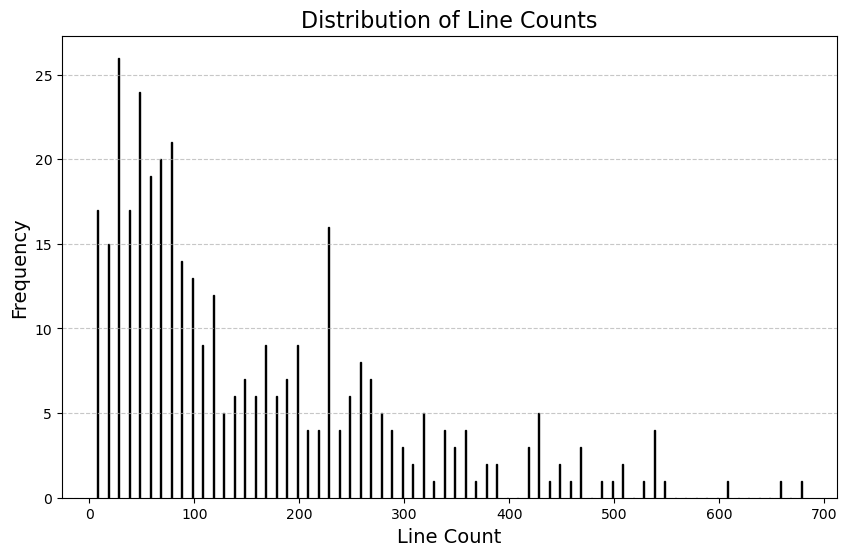

In [3]:
import matplotlib.pyplot as plt

# Extract counts and their frequencies
counts = list(count_distribution.keys())
frequencies = list(count_distribution.values())

# Use a binning strategy appropriate for a Poisson-like distribution
bin_edges = range(min_count, max_count + 10, 10)  # Bin width of 10
bin_counts = [0] * (len(bin_edges) - 1)

# Count frequencies in each bin
for count, frequency in count_distribution.items():
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] <= count < bin_edges[i + 1]:
            bin_counts[i] += frequency
            break

# Update counts and frequencies for plotting
counts = [(bin_edges[i] + bin_edges[i + 1]) // 2 for i in range(len(bin_edges) - 1)]
frequencies = bin_counts

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(counts, frequencies, color='skyblue', edgecolor='black')
plt.title('Distribution of Line Counts', fontsize=16)
plt.xlabel('Line Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
from pathlib import Path
import difflib

# Define the directory containing the cleaned paragraphs
cleaned_paragraphs_dir = Path("/home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs")

# Read all text files in the directory
files = list(cleaned_paragraphs_dir.glob("*.txt"))
file_contents = {file: file.read_text() for file in files}

# Find exact duplicates
exact_duplicates = {}
for file1, content1 in file_contents.items():
    for file2, content2 in file_contents.items():
        if file1 != file2 and content1 == content2:
            if file1 not in exact_duplicates and file2 not in exact_duplicates:
                exact_duplicates[file1] = file2

# Remove exact duplicates
for file1, file2 in exact_duplicates.items():
    print(f"Exact duplicate found: {file1} and {file2}")
    file2.unlink()  # Delete the duplicate file



Exact duplicate found: /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts - The Summer Of Love - The Psychedelic Experience [02 Of 4].txt and /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts  - 08 06 Philosophy and Society II - The Smell of Burnt Almonds.txt
Exact duplicate found: /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Relevance II.txt and /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts  - 02 01 -Philosophies of Asia - Relevance of Oriental Philosophy II.txt
Exact duplicate found: /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts  - 02 03 Philosophies of Asia - Ecology & Religion 1.txt and /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/04 - allan watts - 04 ecology & religion.txt
Exact duplicate found: /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts  - 06 02 Eastern and Western Zen II - Early Chinese Zen I.txt and /home/peaceloveph

In [7]:
from pathlib import Path
import difflib

# Define the directory containing the cleaned paragraphs
cleaned_paragraphs_dir = Path("/home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs")

# Read all text files in the directory
files = list(cleaned_paragraphs_dir.glob("*.txt"))
file_contents = {file: file.read_text() for file in files}

# Find exact duplicates
exact_duplicates = {}
for file1, content1 in file_contents.items():
    for file2, content2 in file_contents.items():
        if file1 != file2 and content1 == content2:
            if file1 not in exact_duplicates and file2 not in exact_duplicates:
                exact_duplicates[file1] = file2

# Remove exact duplicates
for file1, file2 in exact_duplicates.items():
    print(f"Exact duplicate found: {file1} and {file2}")
    file2.unlink()  # Delete the duplicate file


In [10]:
# Find potential near-duplicates
near_duplicates = []
for file1, content1 in file_contents.items():
    for file2, content2 in file_contents.items():
        if file1 != file2:
            # Compare the files using difflib
            diff = difflib.unified_diff(content1.splitlines(), content2.splitlines())
            diff_lines = list(diff)
            if len(diff_lines) > 0 and len(diff_lines) < 10:  # Adjust threshold for near-duplicates
                near_duplicates.append((file1, file2, diff_lines))

print(f"{len(near_duplicates)} near-duplicates found....")

# Print potential near-duplicates
for file1, file2, diff_lines in near_duplicates:
    print(f"Potential near-duplicate found between {file1} and {file2}:")
    for line in diff_lines:
        print(line)
    print("\n")

10 near-duplicates found....
Potential near-duplicate found between /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/alan watts - introduction to meditation - 9.txt and /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/07 - game theory of ethics.txt:
--- 

+++ 

@@ -1,5 +1 @@

- And I kind of say, he can do mixed up with circles and stuff.
-And slowly he's worked it out.
-After all it's fleshed by a break, and by the time they got it to Chicago, the whole town is going to be...
-Laughter.
-The Honorable hopes you have enjoyed this program.
+ But you see, we have very little, although we change the language quite a bit, do you get...


Potential near-duplicate found between /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/Alan Watts - Wisdom of the Mtns II.txt and /home/peacelovephysics/alan_watts_bot/data/cleaned_paragraphs/07 - game theory of ethics.txt:
--- 

+++ 

@@ -1,4 +1 @@

- I want to draw your attention to the fact that very vivid Tibetan